In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

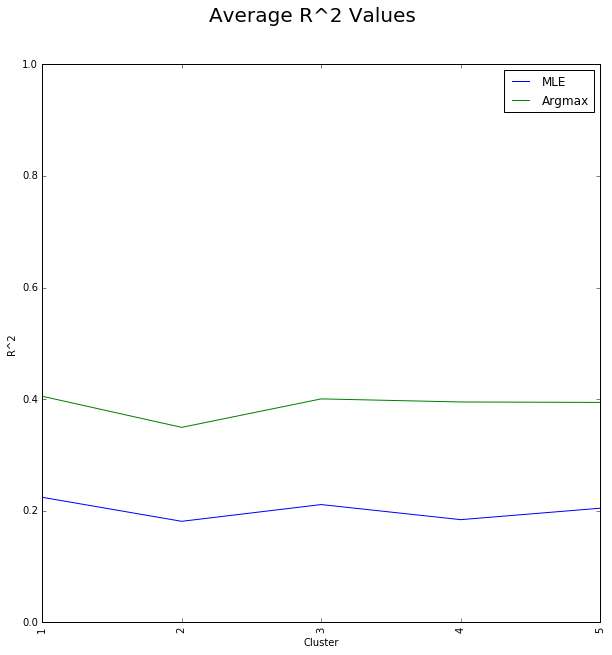

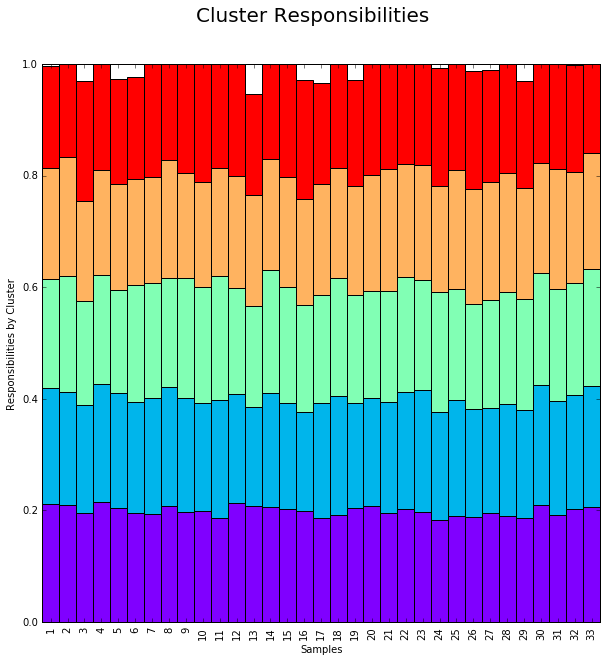

In [19]:
K = 5
N = 33
D = 350000

def plotR2(r2_mle, r2_amx, K):
    f = plt.figure(figsize=(10,10))
    mles = np.zeros(K)
    amxs = np.zeros(K)
    for i in range(r2_mle.shape[0]):
        mles[i] = np.mean(r2_mle[i,:])
        amxs[i] = np.max(r2_amx[i,:])
    mplot, = plt.plot(mles, label='MLE')
    aplot, = plt.plot(amxs, label='Argmax')
    plt.suptitle('Average R^2 Values', fontsize=20)
    plt.ylabel('R^2')
    plt.xlabel('Cluster')
    plt.legend(handles=[mplot, aplot])
    plt.axis([0,K-1,0,1])
    x = [i for i in range(K)]
    labels = [i+1 for i in range(K)]
    plt.xticks(x, labels, rotation='vertical')
    plt.show()


def plotbar(resp):
    f = plt.figure(figsize=(10,10))
    K = resp.shape[0]
    N = resp.shape[1]

    sample_interval = [i for i in range(N)]
    running_sum = np.zeros(N)
    color_vec = plt.cm.rainbow(np.linspace(0, 1, K))
    for i in range(resp.shape[0]):
        plt.bar(sample_interval, resp[i,:], width=1.0, color = color_vec[i], bottom = running_sum)
        running_sum = running_sum + resp[i,:]
    plt.suptitle('Cluster Responsibilities', fontsize=20)
    plt.ylabel('Responsibilities by Cluster')
    plt.xlabel('Samples')
    plt.axis([0,N,0,1])
    #plt.legend(handles=[mplot, aplot])
    x = [i+0.5 for i in range(N)]
    labels = [i+1 for i in range(N)]
    plt.xticks(x, labels, rotation='vertical')
    plt.show()

R2vecMLE =  np.random.normal(0.2,0.1, size=(K,N))
R2vecARGMAX =  np.random.normal(0.2,0.1, size=(K,N))
resp = np.random.normal(0.2,0.01,size=(K,N))
plotR2(R2vecMLE, R2vecARGMAX, K)
plotbar(resp)